In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
!pip install libpysal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.2 MB/s eta 0:00:00


In [4]:
import libpysal as ps

pth = ps.examples.get_path("columbus.shp")
tracts = gpd.GeoDataFrame.from_file(pth)
print("Observations, Attributes:", tracts.shape)
tracts.head()

Observations, Attributes: (49, 21)


,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.45950 13.82035, 8.47341 13.83227, ..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ..."


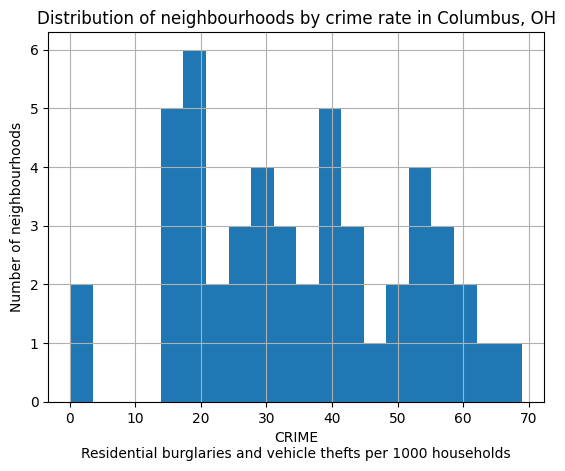

In [5]:
tracts["CRIME"].hist(bins=20)
plt.xlabel("CRIME\nResidential burglaries and vehicle thefts per 1000 households")
plt.ylabel("Number of neighbourhoods")
plt.title("Distribution of neighbourhoods by crime rate in Columbus, OH")
plt.show()

<Axes: >

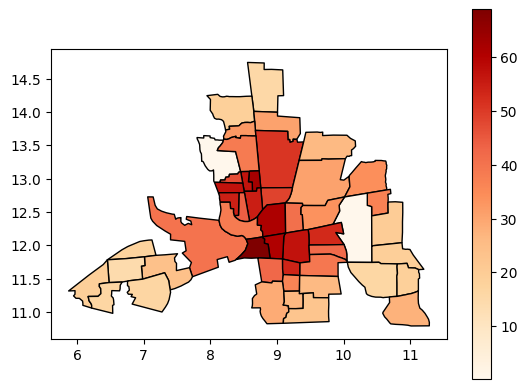

In [6]:
tracts.plot(column="CRIME", cmap="OrRd", edgecolor="k", legend=True)

In [9]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.5 MB/s eta 0:00:00


<Axes: >

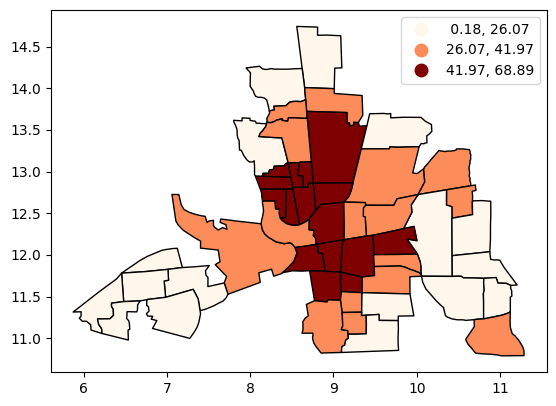

In [10]:
tracts.plot(
    column="CRIME", scheme="quantiles", k=3, cmap="OrRd", edgecolor="k", legend=True
)

<Axes: >

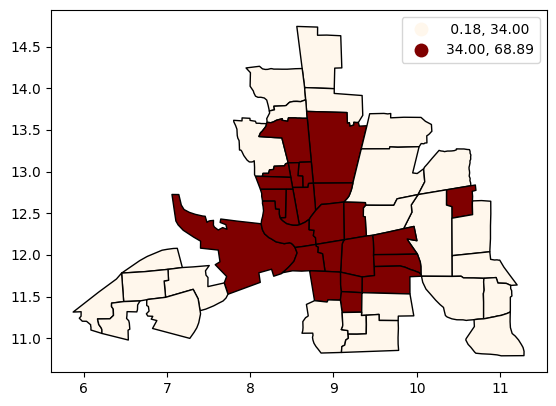

In [11]:
tracts.plot(
    column="CRIME", scheme="quantiles", k=2, cmap="OrRd", edgecolor="k", legend=True
)

<Axes: >

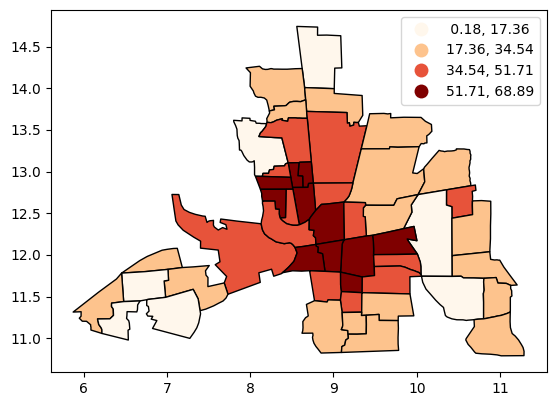

In [12]:
tracts.plot(
    column="CRIME",
    scheme="equal_interval",
    k=4,
    cmap="OrRd",
    edgecolor="k",
    legend=True,
)

<Axes: >

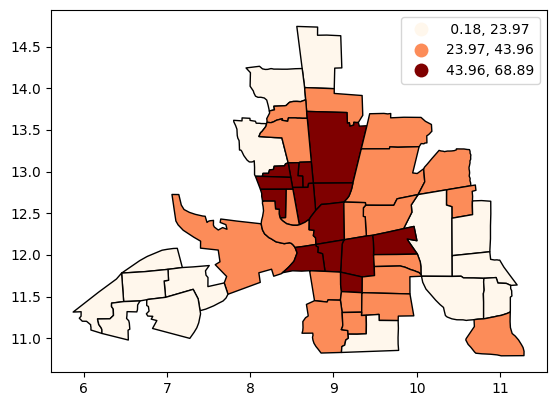

In [13]:
tracts.plot(
    column="CRIME",
    scheme="natural_breaks",
    k=3,
    cmap="OrRd",
    edgecolor="k",
    legend=True,
)

<ipython-input-14-ecb2de573970>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  us_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Observations, Attributes: (18, 7)


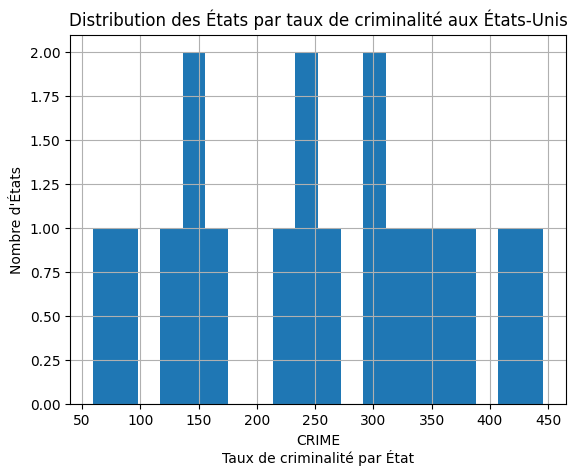

<Axes: >

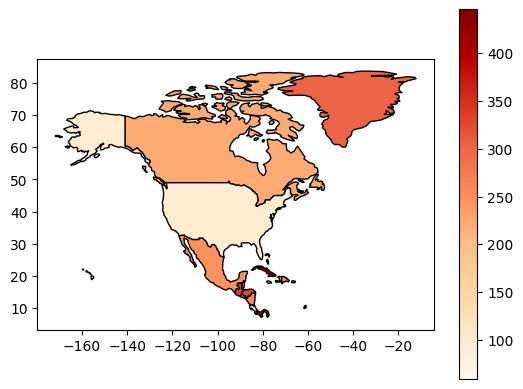

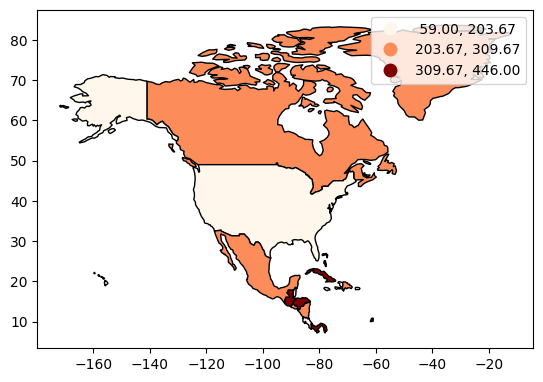

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Étape 1: Charger un shapefile des États-Unis. Ici, j'utilise un exemple qui pourrait représenter les États.
us_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = us_shapefile[us_shapefile['continent'] == "North America"]

# Assurez-vous que vous avez un shapefile adapté si vous souhaitez utiliser les États ou les comtés spécifiquement.

# Étape 2: Ajouter des données fictives sur la criminalité pour les États
import numpy as np
np.random.seed(0)
us['CRIME'] = np.random.randint(50, 500, size=len(us))

print("Observations, Attributes:", us.shape)
us.head()

# Étape 3: Analyser la distribution de la criminalité
us["CRIME"].hist(bins=20)
plt.xlabel("CRIME\nTaux de criminalité par État")
plt.ylabel("Nombre d'États")
plt.title("Distribution des États par taux de criminalité aux États-Unis")
plt.show()

# Étape 4: Visualiser les données sur une carte
us.plot(column="CRIME", cmap="OrRd", edgecolor="k", legend=True)

# Étape 5: Diviser les données en quantiles et visualiser
us.plot(
    column="CRIME", scheme="quantiles", k=3, cmap="OrRd", edgecolor="k", legend=True
)
